In [2]:
# import all necessary modules
import numpy as np
import pandas as pd
import matplotlib
import scipy.stats as stats
from matplotlib import pyplot as plt
from pandas.plotting import table


In [3]:
# read in excel spreadsheet for 2011 data
data_2011 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2011_Industry.xlsx", header=None) 
data_2011

# create a list of the 3rd row to set as the column header later
data_2011_header = data_2011.loc[2,:]

# Replace the first column with the year (we will be making a table with all the years, which is why I'm doing this)
data_2011_header = [w.replace("Total, 16 years and over","2011") for w in data_2011_header]

# verify the header is correct
data_2011_header

# set the header as the column titles
data_2011.columns = data_2011_header
data_2011.columns

Index(['Industry', '2011', '16-19 years', '20-24 years', '25-34 years',
       '35-44 years', '45-54 years', '55-64 years', '65 years and over',
       'Median age'],
      dtype='object')

In [4]:
# clean the data
data_2011 = data_2011.dropna()

# reset the index
data_2011 = data_2011.reset_index(drop=True)

# Get rid of the first row
data_2011 = data_2011.drop([0],axis = 0)

data_2011

,Industry,2011,16-19 years,20-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65 years and over,Median age
1,"Total, all industries",139869,4327,13036,30537,30270,32867,22186,6647,42.1
2,"Agriculture, forestry, fishing, and hunting",2254,109,185,369,361,464,428,339,47.1
3,Crop production,966,46,85,173,162,195,169,138,45.6
4,Animal production,907,54,73,120,125,177,177,182,49.8
5,"Forestry, except logging",42,1,1,11,6,10,11,3,–
...,...,...,...,...,...,...,...,...,...,...
309,"Justice, public order, and safety activities",2820,11,108,724,823,672,399,83,41.8
310,Administration of human resource programs,976,3,37,176,224,264,228,44,46.9
311,Administration of environmental quality an...,299,2,10,51,58,99,73,8,49.2
312,Administration of economic programs and sp...,594,2,23,89,122,193,140,26,48.4


In [5]:
# keep just the year's amount of data (don't need the age groups for this analysis)
data_2011 = data_2011.loc[:,['Industry','2011']]
data_2011

,Industry,2011
1,"Total, all industries",139869
2,"Agriculture, forestry, fishing, and hunting",2254
3,Crop production,966
4,Animal production,907
5,"Forestry, except logging",42
...,...,...
309,"Justice, public order, and safety activities",2820
310,Administration of human resource programs,976
311,Administration of environmental quality an...,299
312,Administration of economic programs and sp...,594


In [6]:
# read in 2012 data and apply same methods and functions as we did for 2011
data_2012 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2012_Industry.xlsx", header=None) 
data_2012
data_2012_header = data_2012.loc[2,:]
data_2012_header = [w.replace("Total, 16 years and over","2012") for w in data_2012_header]

data_2012.columns = data_2012_header
data_2012 = data_2012.dropna()
data_2012 = data_2012.reset_index(drop=True)
data_2012 = data_2012.drop([0],axis = 0)
data_2012 = data_2012.loc[:,['Industry','2012']]
data_2012

,Industry,2012
1,"Total, all industries",142469
2,"Agriculture, forestry, fishing, and hunting",2186
3,Crop production,955
4,Animal production,899
5,"Forestry, except logging",49
...,...,...
309,"Justice, public order, and safety activities",2690
310,Administration of human resource programs,940
311,Administration of environmental quality an...,298
312,Administration of economic programs and sp...,561


In [7]:
# read and clean up 2013 data
data_2013 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2013_Industry.xlsx", header=None) 
data_2013
data_2013_header = data_2013.loc[2,:]
data_2013_header = [w.replace("Total, 16 years and over","2013") for w in data_2013_header]

data_2013.columns = data_2013_header

data_2013 = data_2013.dropna()
data_2013 = data_2013.reset_index(drop=True)
data_2013 = data_2013.drop([0],axis = 0)

data_2013 = data_2013.loc[:,['Industry','2013']]
data_2013

,Industry,2013
1,"Total, all industries",143929
2,"Agriculture, forestry, fishing, and hunting",2130
3,Crop production,981
4,Animal production,780
5,"Forestry, except logging",47
...,...,...
309,"Justice, public order, and safety activities",2789
310,Administration of human resource programs,919
311,Administration of environmental quality an...,265
312,Administration of economic programs and sp...,516


In [8]:
# read and clean up 2014 data
data_2014 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2014_Industry.xlsx", header=None) 
data_2014
data_2014_header = data_2014.loc[4,:]
data_2014_header = data_2014_header.fillna("")

data_2014_header = [w.replace("Total, 16\nyears and\n over","2014") for w in data_2014_header]
data_2014_header = [w.replace("\n","") for w in data_2014_header]

data_2014_header

data_2014.columns = data_2014_header
data_2014.rename(columns={data_2014.columns[0]: "Industry"}, inplace = True)
data_2014 = data_2014.dropna()

data_2014 = data_2014.loc[:,['Industry','2014']]
data_2014 = data_2014.reset_index(drop=True)
data_2014.index = np.arange(1, len(data_2014) + 1)
data_2014


,Industry,2014
1,Total employed,146305
2,"Agriculture, forestry, fishing, and hunting",2237
3,Crop production,1107
4,Animal production and aquaculture,780
5,"Forestry, except logging",54
...,...,...
309,"Justice, public order, and safety activities",2795
310,Administration of human resource programs,966
311,Administration of environmental quality and ho...,253
312,Administration of economic programs and space ...,502


In [9]:
# read and clean up 2015 data
data_2015 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2015_Industry.xlsx", header=None) 
data_2015
data_2015_header = data_2015.loc[4,:]
data_2015_header = data_2015_header.fillna("")

data_2015_header = [w.replace("Total, 16\nyears and\n over","2015") for w in data_2015_header]
data_2015_header = [w.replace("\n","") for w in data_2015_header]

data_2015_header

data_2015.columns = data_2015_header
data_2015.rename(columns={data_2015.columns[0]: "Industry"}, inplace = True)
data_2015 = data_2015.dropna()


data_2015 = data_2015.loc[:,['Industry','2015']]
data_2015.reset_index(drop=True)
data_2015.index = np.arange(1, len(data_2015) + 1)

data_2015

,Industry,2015
1,Total employed,148834
2,"Agriculture, forestry, fishing, and hunting",2422
3,Crop production,1219
4,Animal production and aquaculture,847
5,"Forestry, except logging",49
...,...,...
309,"Justice, public order, and safety activities",2856
310,Administration of human resource programs,1000
311,Administration of environmental quality and ho...,260
312,Administration of economic programs and space ...,554


In [10]:
# read and clean up 2016 data
data_2016 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2016_Industry.xlsx", header=None) 
data_2016
data_2016_header = data_2016.loc[4,:]
data_2016_header = data_2016_header.fillna("")

data_2016_header = [w.replace("Total, 16\nyears and\n over","2016") for w in data_2016_header]
data_2016_header = [w.replace("\n","") for w in data_2016_header]

data_2016_header

data_2016.columns = data_2016_header
data_2016.rename(columns={data_2016.columns[0]: "Industry"}, inplace = True)
data_2016 = data_2016.dropna()
data_2016

data_2016 = data_2016.loc[:,['Industry','2016']]
data_2016.reset_index(drop=True)
data_2016.index = np.arange(1, len(data_2016) + 1)

data_2016

,Industry,2016
1,Total employed,151436
2,"Agriculture, forestry, fishing, and hunting",2460
3,Crop production,1206
4,Animal production and aquaculture,876
5,"Forestry, except logging",58
...,...,...
309,"Justice, public order, and safety activities",2739
310,Administration of human resource programs,995
311,Administration of environmental quality and ho...,248
312,Administration of economic programs and space ...,529


In [11]:
# read and clean up 2017 data
data_2017 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2017_Industry.xlsx", header=None) 
data_2017
data_2017_header = data_2017.loc[4,:]
data_2017_header = data_2017_header.fillna("")

data_2017_header = [w.replace("Total, 16\nyears and\n over","2017") for w in data_2017_header]
data_2017_header = [w.replace("\n","") for w in data_2017_header]

data_2017_header

data_2017.columns = data_2017_header
data_2017.rename(columns={data_2017.columns[0]: "Industry"}, inplace = True)
data_2017 = data_2017.dropna()
data_2017

data_2017 = data_2017.loc[:,['Industry','2017']]
data_2017.reset_index(drop=True)
data_2017.index = np.arange(1, len(data_2017) + 1)

data_2017

,Industry,2017
1,Total employed,153337
2,"Agriculture, forestry, fishing, and hunting",2454
3,Crop production,1202
4,Animal production and aquaculture,848
5,"Forestry, except logging",61
...,...,...
309,"Justice, public order, and safety activities",2761
310,Administration of human resource programs,985
311,Administration of environmental quality and ho...,263
312,Administration of economic programs and space ...,540


In [12]:
# read and clean up 2018 data
data_2018 = pd.read_excel(r"C:\Users\salil\Documents\Project_1_Data_Sets\2018_Industry.xlsx", header=None) 
data_2018
data_2018_header = data_2018.loc[4,:]
data_2018_header = data_2018_header.fillna("")

data_2018_header = [w.replace("Total, 16\nyears and\n over","2018") for w in data_2018_header]
data_2018_header = [w.replace("\n","") for w in data_2018_header]

data_2018_header

data_2018.columns = data_2018_header
data_2018.rename(columns={data_2018.columns[0]: "Industry"}, inplace = True)
data_2018 = data_2018.dropna()
data_2018

data_2018 = data_2018.loc[:,['Industry','2018']]
data_2018.reset_index(drop=True)
data_2018.index = np.arange(1, len(data_2018) + 1)

data_2018


,Industry,2018
1,Total employed,155761
2,"Agriculture, forestry, fishing, and hunting",2425
3,Crop production,1230
4,Animal production and aquaculture,810
5,"Forestry, except logging",43
...,...,...
309,"Justice, public order, and safety activities",2827
310,Administration of human resource programs,1097
311,Administration of environmental quality and ho...,266
312,Administration of economic programs and space ...,557


In [13]:
# add the yearly data to the original dataframe to create a new dataframe
industry_data       = pd.concat([data_2011, 
                                 data_2012['2012'],
                                 data_2013['2013'],
                                 data_2014['2014'],
                                 data_2015['2015'],
                                 data_2016['2016'],
                                 data_2017['2017'],
                                 data_2018['2018']], axis=1)

industry_data = industry_data.drop([1])
industry_data = industry_data.set_index('Industry')
industry_data_years = industry_data

industry_data_years

,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,
"Agriculture, forestry, fishing, and hunting",2254,2186,2130,2237,2422,2460,2454,2425
Crop production,966,955,981,1107,1219,1206,1202,1230
Animal production,907,899,780,780,847,876,848,810
"Forestry, except logging",42,49,47,54,49,58,61,43
Logging,97,82,91,92,83,101,103,112
...,...,...,...,...,...,...,...,...
"Justice, public order, and safety activities",2820,2690,2789,2795,2856,2739,2761,2827
Administration of human resource programs,976,940,919,966,1000,995,985,1097
Administration of environmental quality and housing programs,299,298,265,253,260,248,263,266


In [14]:
# Get the Average number of Jobs for each industry
industry_data['Average Jobs'] = (industry_data['2011'] + 
                                 industry_data['2012'] + 
                                 industry_data['2013'] + 
                                 industry_data['2014'] + 
                                 industry_data['2015'] + 
                                 industry_data['2016'] + 
                                 industry_data['2017'] + 
                                 industry_data['2018']) / 8


industry_data
 


,2011,2012,2013,2014,2015,2016,2017,2018,Average Jobs
Industry,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",2254,2186,2130,2237,2422,2460,2454,2425,2321
Crop production,966,955,981,1107,1219,1206,1202,1230,1108.25
Animal production,907,899,780,780,847,876,848,810,843.375
"Forestry, except logging",42,49,47,54,49,58,61,43,50.375
Logging,97,82,91,92,83,101,103,112,95.125
...,...,...,...,...,...,...,...,...,...
"Justice, public order, and safety activities",2820,2690,2789,2795,2856,2739,2761,2827,2784.62
Administration of human resource programs,976,940,919,966,1000,995,985,1097,984.75
Administration of environmental quality and housing programs,299,298,265,253,260,248,263,266,269


In [15]:
# Calculate the change from 2011 to 2018
industry_data['7 Year Delta'] = industry_data['2018'] - industry_data['2011']

# Calculate the percentage of the total for Average # of jobs
industry_data['Percentage of Total'] = industry_data['Average Jobs'] / industry_data['Average Jobs'].sum() * 100

# Round off the Percentage of Total
industry_data['Percentage of Total'] = industry_data['Percentage of Total'].astype(float).round(2)

# Calculate the percentage change for each industry
industry_data['Percentage Change'] = industry_data['7 Year Delta'] / industry_data['2011'] *100

# Round off the Percentage Change
industry_data['Percentage Change'] = industry_data['Percentage Change'].astype(float).round(2)
industry_data


,2011,2012,2013,2014,2015,2016,2017,2018,Average Jobs,7 Year Delta,Percentage of Total,Percentage Change
Industry,,,,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",2254,2186,2130,2237,2422,2460,2454,2425,2321,171,0.51,7.59
Crop production,966,955,981,1107,1219,1206,1202,1230,1108.25,264,0.24,27.33
Animal production,907,899,780,780,847,876,848,810,843.375,-97,0.19,-10.69
"Forestry, except logging",42,49,47,54,49,58,61,43,50.375,1,0.01,2.38
Logging,97,82,91,92,83,101,103,112,95.125,15,0.02,15.46
...,...,...,...,...,...,...,...,...,...,...,...,...
"Justice, public order, and safety activities",2820,2690,2789,2795,2856,2739,2761,2827,2784.62,7,0.61,0.25
Administration of human resource programs,976,940,919,966,1000,995,985,1097,984.75,121,0.22,12.40
Administration of environmental quality and housing programs,299,298,265,253,260,248,263,266,269,-33,0.06,-11.04


In [16]:
#Create DataFrame of Relevant data points to share

# get the row that has the highest percentage change (need for DataFrame later)
industry_percent_change_max = industry_data.loc[industry_data['Percentage Change'] == industry_data['Percentage Change'].max()]

# get the row that has the lowest percentage change (need for DataFrame later)
industry_percent_change_min = industry_data.loc[industry_data['Percentage Change'] == industry_data['Percentage Change'].min()]

# get the row that has the highest jobs change (need for DataFrame later)
industry_jobs_change_max = industry_data.loc[industry_data['7 Year Delta'] == industry_data['7 Year Delta'].max()]

# # get the row that has the lowest jobs change (need for DataFrame later)
industry_jobs_change_min = industry_data.loc[industry_data['7 Year Delta'] == industry_data['7 Year Delta'].min()]


# Create DataFrame highlighting these key data points

analysis_groups = ["Greatest Job Growth",
                   "Lowest Job Growth", 
                   "Greatest Job Percentage Growth", 
                   "Lowest Job Percentage Growth"]

analysis_industry = [industry_jobs_change_max.index[0], 
                     industry_jobs_change_min.index[0], 
                     industry_percent_change_max.index[0], 
                     industry_percent_change_min.index[0]]

analysis_values = [industry_data['7 Year Delta'].max(),
                   industry_data['7 Year Delta'].min(),
                   industry_data['Percentage Change'].max(),
                   industry_data['Percentage Change'].min()]

analysis_values = pd.to_numeric(analysis_values)
analysis_values = analysis_values.astype(int)

analysis_df = pd.DataFrame(list(zip( analysis_groups,analysis_industry, analysis_values)), 
               columns =['Key Points','Industry', 'Value'])


#analysis_df = analysis_df.set_index('Key Points')
analysis_df



,Key Points,Industry,Value
0,Greatest Job Growth,Education and health services,3176
1,Lowest Job Growth,Aerospace product and parts manufacturing,-387
2,Greatest Job Percentage Growth,Electronic shopping,194
3,Lowest Job Percentage Growth,Aerospace product and parts manufacturing,-88


In [17]:
# Sort by average number of jobs for each industry and display top 10
industry_data = industry_data.sort_values('Average Jobs',ascending = False).groupby('Industry').head(2)
industry_top_10 = industry_data.head(10)

industry_top_10


,2011,2012,2013,2014,2015,2016,2017,2018,Average Jobs,7 Year Delta,Percentage of Total,Percentage Change
Industry,,,,,,,,,,,,
Education and health services,31867,32350,32535,32830,33678,34263,34483,35043,33381.1,3176,7.34,9.97
Wholesale and retail trade,19726,19876,19653,20251,20320,20218,20314,20270,20078.5,544,4.41,2.76
Health care and social assistance,18902,19405,19562,19577,20077,20589,20720,21133,19995.6,2231,4.39,11.80
Professional and business services,15819,16539,16793,17004,17409,18325,18835,18950,17459.2,3131,3.84,19.79
Retail trade,15927,16182,16007,16609,16686,16577,16720,16599,16413.4,672,3.61,4.22
Manufacturing,14336,14686,14869,15100,15338,15408,15408,15560,15088.1,1224,3.32,8.54
Leisure and hospitality,12697,13193,13554,13489,13821,14193,14291,14268,13688.2,1571,3.01,12.37
Educational services,12965,12945,12974,13253,13601,13674,13763,13910,13385.6,945,2.94,7.29
Professional and technical services,9461,9913,10110,10327,10625,11228,11764,12105,10691.6,2644,2.35,27.95


In [18]:
#keep only the years data because we need to plot with this

industry_top_10_years = industry_top_10.drop(['Average Jobs','7 Year Delta','Percentage of Total','Percentage Change'], axis=1)
industry_top_10_years

,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,
Education and health services,31867,32350,32535,32830,33678,34263,34483,35043
Wholesale and retail trade,19726,19876,19653,20251,20320,20218,20314,20270
Health care and social assistance,18902,19405,19562,19577,20077,20589,20720,21133
Professional and business services,15819,16539,16793,17004,17409,18325,18835,18950
Retail trade,15927,16182,16007,16609,16686,16577,16720,16599
Manufacturing,14336,14686,14869,15100,15338,15408,15408,15560
Leisure and hospitality,12697,13193,13554,13489,13821,14193,14291,14268
Educational services,12965,12945,12974,13253,13601,13674,13763,13910
Professional and technical services,9461,9913,10110,10327,10625,11228,11764,12105


In [20]:
# Sort by 7 year delta for each industry and display bottom 10
industry_data = industry_data.sort_values('7 Year Delta',ascending = True).groupby('Industry').head(2)
industry_bot_10 = industry_data.head(10)

industry_bot_10


,2011,2012,2013,2014,2015,2016,2017,2018,Average Jobs,7 Year Delta,Percentage of Total,Percentage Change
Industry,,,,,,,,,,,,
Aerospace product and parts manufacturing,438,427,430,352,102,73,52,51,240.625,-387,0.05,-88.36
Department stores and discount stores,2218,2205,2110,2131,2090,2077,2069,1921,2102.62,-297,0.46,-13.39
Information,3150,2971,2960,3115,2988,2855,2903,2919,2982.62,-231,0.66,-7.33
Other health care services,1738,2392,1941,1323,1331,1417,1576,1550,1658.5,-188,0.36,-10.82
Computers and electronic products manufacturing,1267,1272,1302,1249,1171,1215,1118,1096,1211.25,-171,0.27,-13.50
Wired telecommunications carriers,564,523,556,523,502,466,505,434,509.125,-130,0.11,-23.05
Wholesale trade,3798,3694,3646,3642,3635,3641,3594,3671,3665.12,-127,0.81,-3.34
Nursing care facilities,1778,1726,1799,1836,1830,1786,1658,1652,1758.12,-126,0.39,-7.09
Business support services,830,793,760,793,803,808,695,705,773.375,-125,0.17,-15.06


In [22]:
#keep only the years data because we need to plot with this

industry_bot_10_years = industry_bot_10.drop(['Average Jobs','7 Year Delta','Percentage of Total','Percentage Change'], axis=1)
industry_bot_10_years

,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,
Aerospace product and parts manufacturing,438,427,430,352,102,73,52,51
Department stores and discount stores,2218,2205,2110,2131,2090,2077,2069,1921
Information,3150,2971,2960,3115,2988,2855,2903,2919
Other health care services,1738,2392,1941,1323,1331,1417,1576,1550
Computers and electronic products manufacturing,1267,1272,1302,1249,1171,1215,1118,1096
Wired telecommunications carriers,564,523,556,523,502,466,505,434
Wholesale trade,3798,3694,3646,3642,3635,3641,3594,3671
Nursing care facilities,1778,1726,1799,1836,1830,1786,1658,1652
Business support services,830,793,760,793,803,808,695,705


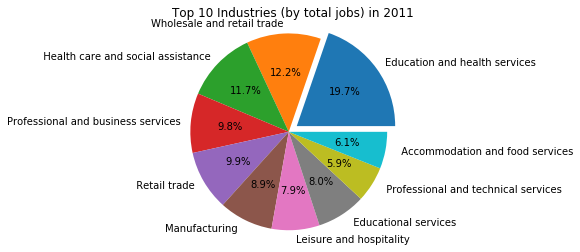

In [598]:
# Pie chart of Top 10 Industries in 2011 by total jobs

explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

plt.pie(industry_top_10_years["2011"], explode = explode, labels = industry_top_10_years.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top 10 Industries (by total jobs) in 2011")

plt.savefig('top_10_industry_2011.png', bbox_inches='tight')
plt.show()


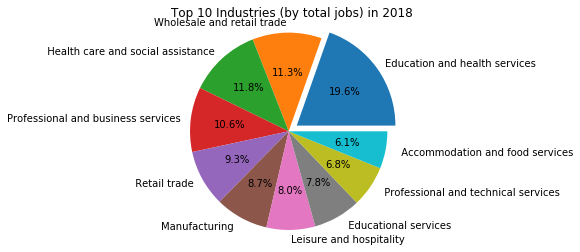

In [599]:
# Pie chart of Top 10 Industries in 2018 by total jobs

explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

plt.pie(industry_top_10["2018"], explode = explode, labels = industry_top_10.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top 10 Industries (by total jobs) in 2018")
plt.savefig('top_10_industry_2018.png', bbox_inches='tight')

plt.show()

In [600]:
industry_top_10_years

,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,
Education and health services,31867,32350,32535,32830,33678,34263,34483,35043
Wholesale and retail trade,19726,19876,19653,20251,20320,20218,20314,20270
Health care and social assistance,18902,19405,19562,19577,20077,20589,20720,21133
Professional and business services,15819,16539,16793,17004,17409,18325,18835,18950
Retail trade,15927,16182,16007,16609,16686,16577,16720,16599
Manufacturing,14336,14686,14869,15100,15338,15408,15408,15560
Leisure and hospitality,12697,13193,13554,13489,13821,14193,14291,14268
Educational services,12965,12945,12974,13253,13601,13674,13763,13910
Professional and technical services,9461,9913,10110,10327,10625,11228,11764,12105


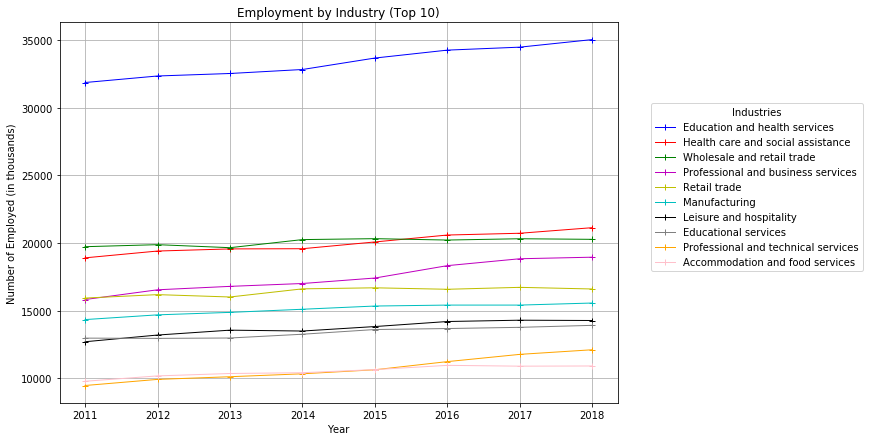

In [25]:
# line plot showing employment trends for top 10 industries
x = industry_top_10_years.columns

# create lines for each industry
plt.figure(figsize=(10, 7))
education_and_health_services = plt.plot(x, industry_top_10_years.loc['Education and health services'], marker="+",color="blue", linewidth=1, label="Education and health services")
health_care = plt.plot(x, industry_top_10_years.loc['  Health care and social assistance'], marker="+",color="red", linewidth=1, label="Health care and social assistance")
wholesale_retail = plt.plot(x, industry_top_10_years.loc['Wholesale and retail trade'], marker="+",color="g", linewidth=1, label="Wholesale and retail trade")
professional_business = plt.plot(x, industry_top_10_years.loc['Professional and business services'], marker="+",color="m", linewidth=1, label="Professional and business services")
retail_trade = plt.plot(x, industry_top_10_years.loc['  Retail trade'], marker="+",color="y", linewidth=1, label="Retail trade")
manufacturing = plt.plot(x, industry_top_10_years.loc['Manufacturing '], marker="+",color="c", linewidth=1, label="Manufacturing")
leisure_hospitality = plt.plot(x, industry_top_10_years.loc['Leisure and hospitality'], marker="+",color="k", linewidth=1, label="Leisure and hospitality")
educational_services = plt.plot(x, industry_top_10_years.loc['  Educational services'], marker="+",color="grey", linewidth=1, label="Educational services")
professional_technical = plt.plot(x, industry_top_10_years.loc['  Professional and technical services'], marker="+",color="orange", linewidth=1, label="Professional and technical services")
accommodation_food_services = plt.plot(x, industry_top_10_years.loc['  Accommodation and food services'], marker="+",color="pink", linewidth=1, label="Accommodation and food services")

# label and title the chart

plt.title('Employment by Industry (Top 10)')
plt.xlabel('Year')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Industries', loc='upper center',  bbox_to_anchor=(1.25, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]

plt.savefig('employment_by_industry.png', bbox_inches='tight')

plt.show()


In [26]:
#Getting the index of the bottom 10 in differential (for bottom 10 graph)
industry_bot_10_years.index

Index(['      Aerospace product and parts manufacturing',
       '    Department stores and discount stores', 'Information',
       '      Other health care services',
       '    Computers and electronic products manufacturing',
       '    Wired telecommunications carriers', '  Wholesale trade',
       '      Nursing care facilities', '    Business support services',
       '    Newspaper publishers'],
      dtype='object', name='Industry')

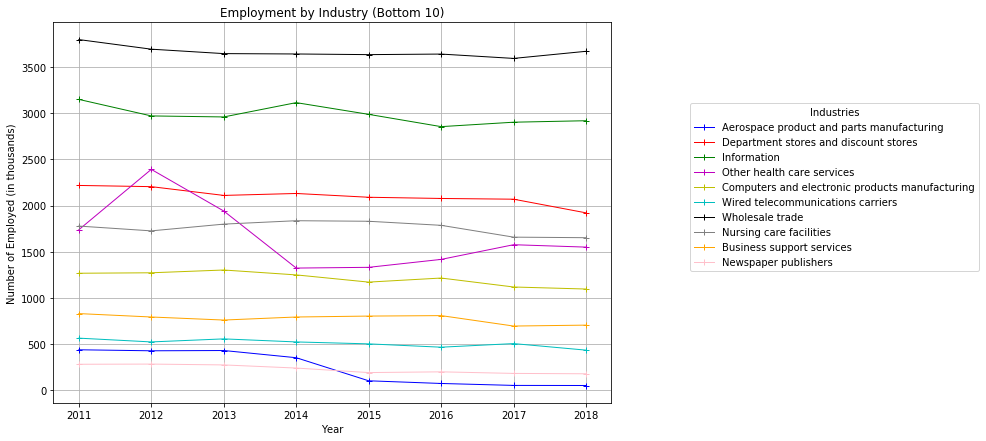

In [29]:
# line plot showing employment trends for bottom 10 industries
x = industry_bot_10_years.columns

# create lines for each industry
plt.figure(figsize=(10, 7))
aerospace = plt.plot(x, industry_bot_10_years.loc['      Aerospace product and parts manufacturing'], marker="+",color="blue", linewidth=1, label="Aerospace product and parts manufacturing")
dept_stores = plt.plot(x, industry_bot_10_years.loc['    Department stores and discount stores'], marker="+",color="red", linewidth=1, label="Department stores and discount stores")
information = plt.plot(x, industry_bot_10_years.loc['Information'], marker="+",color="g", linewidth=1, label="Information")
other_health_care = plt.plot(x, industry_bot_10_years.loc['      Other health care services'], marker="+",color="m", linewidth=1, label="Other health care services")
computers_electronics = plt.plot(x, industry_bot_10_years.loc['    Computers and electronic products manufacturing'], marker="+",color="y", linewidth=1, label="Computers and electronic products manufacturing")
wired_telecom = plt.plot(x, industry_bot_10_years.loc['    Wired telecommunications carriers'], marker="+",color="c", linewidth=1, label="Wired telecommunications carriers")
wholesale_trade = plt.plot(x, industry_bot_10_years.loc['  Wholesale trade'], marker="+",color="k", linewidth=1, label="Wholesale trade")
nursing_care = plt.plot(x, industry_bot_10_years.loc['      Nursing care facilities'], marker="+",color="grey", linewidth=1, label="Nursing care facilities")
business_support = plt.plot(x, industry_bot_10_years.loc['    Business support services'], marker="+",color="orange", linewidth=1, label="Business support services")
newspaper_publishers = plt.plot(x, industry_bot_10_years.loc['    Newspaper publishers'], marker="+",color="pink", linewidth=1, label="Newspaper publishers")

# label and title the chart

plt.title('Employment by Industry (Bottom 10)')
plt.xlabel('Year')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Industries', loc='upper center',  bbox_to_anchor=(1.4, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]

plt.savefig('employment_by_industry_bot_10.png', bbox_inches='tight')

plt.show()


In [37]:
# Sort by percentage change for each industry and display top 10
industry_data = industry_data.sort_values('Percentage Change',ascending = False).groupby('Industry').head(2)
industry_high_percent = industry_data.head(10)
industry_high_percent

,2011,2012,2013,2014,2015,2016,2017,2018,Average Jobs,7 Year Delta,Percentage of Total,Percentage Change
Industry,,,,,,,,,,,,
Electronic shopping,151,168,179,226,285,328,351,445,266.625,294,0.06,194.70
Taxi and limousine service,234,225,261,301,337,420,564,689,378.875,455,0.08,194.44
Internet publishing and broadcasting and web search portals,63,60,81,91,114,130,118,153,101.25,90,0.02,142.86
Not specified machinery manufacturing,7,6,3,6,10,12,12,17,9.125,10,0.00,142.86
Aircraft and parts manufacturing,390,385,417,449,734,729,753,805,582.75,415,0.13,106.41
Not specified food industries,38,70,47,24,54,48,95,73,56.125,35,0.01,92.11
Miscellaneous nonmetallic mineral product manufacturing,52,57,70,64,82,92,94,99,76.25,47,0.02,90.38
Warehousing and storage,361,417,457,466,465,569,597,634,495.75,273,0.11,75.62
Footwear and leather goods repair,4,8,13,4,1,5,4,7,5.75,3,0.00,75.00


In [33]:


#keep only the years data because we need to plot with this

industry_high_percent = industry_high_percent.drop(['Average Jobs','7 Year Delta','Percentage of Total','Percentage Change'], axis=1)
industry_high_percent

,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,
Electronic shopping,151,168,179,226,285,328,351,445
Taxi and limousine service,234,225,261,301,337,420,564,689
Internet publishing and broadcasting and web search portals,63,60,81,91,114,130,118,153
Not specified machinery manufacturing,7,6,3,6,10,12,12,17
Aircraft and parts manufacturing,390,385,417,449,734,729,753,805
Not specified food industries,38,70,47,24,54,48,95,73
Miscellaneous nonmetallic mineral product manufacturing,52,57,70,64,82,92,94,99
Warehousing and storage,361,417,457,466,465,569,597,634
Footwear and leather goods repair,4,8,13,4,1,5,4,7


In [34]:
industry_high_percent.index

Index(['    Electronic shopping', '    Taxi and limousine service',
       '    Internet publishing and broadcasting and web search portals',
       '      Not specified machinery manufacturing',
       '      Aircraft and parts manufacturing',
       '      Not specified food industries',
       '      Miscellaneous nonmetallic mineral product manufacturing',
       '    Warehousing and storage',
       '      Footwear and leather goods repair',
       '      Prefabricated wood buildings and mobile homes'],
      dtype='object', name='Industry')

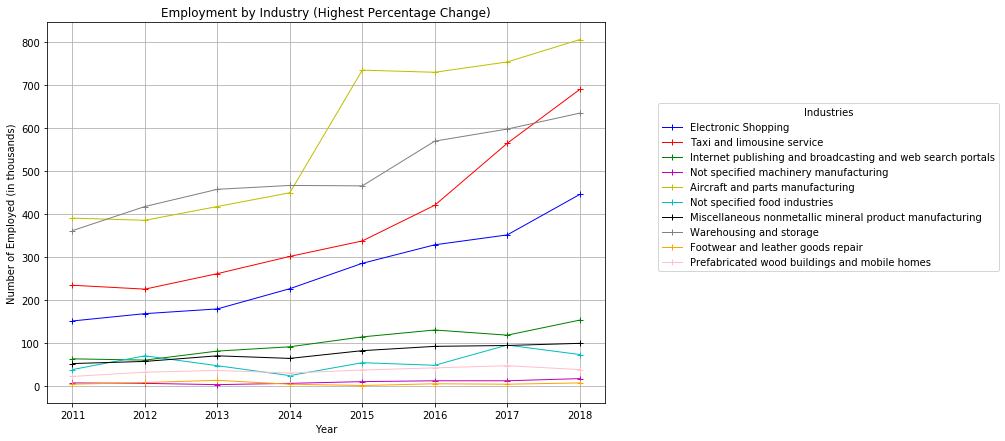

In [35]:
# line plot showing employment trends for bottom 10 industries
x = industry_high_percent.columns

# create lines for each industry
plt.figure(figsize=(10, 7))
electronic_shopping = plt.plot(x, industry_high_percent.loc['    Electronic shopping'], marker="+",color="blue", linewidth=1, label="Electronic Shopping")
taxi_limousine = plt.plot(x, industry_high_percent.loc['    Taxi and limousine service'], marker="+",color="red", linewidth=1, label="Taxi and limousine service")
internet_publishing = plt.plot(x, industry_high_percent.loc['    Internet publishing and broadcasting and web search portals'], marker="+",color="g", linewidth=1, label="Internet publishing and broadcasting and web search portals")
unspecified_machinery = plt.plot(x, industry_high_percent.loc['      Not specified machinery manufacturing'], marker="+",color="m", linewidth=1, label="Not specified machinery manufacturing")
aircraft_parts = plt.plot(x, industry_high_percent.loc['      Aircraft and parts manufacturing'], marker="+",color="y", linewidth=1, label="Aircraft and parts manufacturing")
unspecified_food = plt.plot(x, industry_high_percent.loc['      Not specified food industries'], marker="+",color="c", linewidth=1, label="Not specified food industries")
misc_mineral_product = plt.plot(x, industry_high_percent.loc['      Miscellaneous nonmetallic mineral product manufacturing'], marker="+",color="k", linewidth=1, label="Miscellaneous nonmetallic mineral product manufacturing")
warehouse_storage = plt.plot(x, industry_high_percent.loc['    Warehousing and storage'], marker="+",color="grey", linewidth=1, label="Warehousing and storage")
footwear_leather_goods = plt.plot(x, industry_high_percent.loc['      Footwear and leather goods repair'], marker="+",color="orange", linewidth=1, label="Footwear and leather goods repair")
prefab_wood_buildings = plt.plot(x, industry_high_percent.loc['      Prefabricated wood buildings and mobile homes'], marker="+",color="pink", linewidth=1, label="Prefabricated wood buildings and mobile homes")

# label and title the chart

plt.title('Employment by Industry (Highest Percentage Change)')
plt.xlabel('Year')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Industries', loc='upper center',  bbox_to_anchor=(1.4, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]

plt.savefig('employment_by_industry_highest_percent.png', bbox_inches='tight')

plt.show()
